#### Предсказываем цену ноутбука

В папке лежит датасет laptop_prices, в котором содержатся сведения о ноутбуках, их характеристики и цены. Обучите модель линейной регрессии, которая будет предсказывать цену ноутбука по его характеристикам. 

Придется хорошенько поработать с характеристиками: это *творческая* часть задания. Во-первых, надо привести их в машиночитаемый вид, а во-вторых, можно посмотреть, как они коррелируют друг с другом и не нужно ли кого-то из них дропнуть или наоборот. Не советую бездумно использовать OHE: некоторые признаки явно можно закодировать куда более оптимальным способом. 

*Примечание*: без работы над фичами за все дз - **0 баллов**. 

In [9]:
import pandas as pd

In [10]:
data = pd.read_csv('laptop_prices.csv')
data.head()

,Brand,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Operating System,Price ($)
0,Apple,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,FreeDOS,3997.07
1,Razer,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,Linux,1355.78
2,Asus,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,FreeDOS,2673.07
3,Lenovo,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,Windows,751.17
4,Razer,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,Linux,2059.83


Давайте все заэнкодим, чтобы можно было понять, какие параметры влияют на цену. Подозрение, что производитель не сильно влияет на цену, поэтому эта категория первая в очереди на удаление (в ней слишком много значений). Подозреваю, что ОС тоже не влияет, или влияет не сильно.

In [ ]:
encoded_data = pd.get_dummies(data, columns=['Brand', "Operating System"])
encoded_data.head()

,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Price ($),Brand_Acer,...,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Razer,Brand_Samsung,Operating System_FreeDOS,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,AMD Ryzen 3,64,512GB SSD,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,3997.07,False,...,False,False,False,False,False,False,True,False,False,False
1,AMD Ryzen 7,4,1TB SSD,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,1355.78,False,...,False,False,False,False,True,False,False,True,False,False
2,Intel i5,32,2TB SSD,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,2673.07,False,...,False,False,False,False,False,False,True,False,False,False
3,Intel i5,4,256GB SSD,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,751.17,False,...,False,True,False,False,False,False,False,False,True,False
4,Intel i3,4,256GB SSD,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,2059.83,False,...,False,False,False,False,True,False,False,True,False,False


В хранилище есть зависимость, чем больше емкость, тем лучше, поэтому создадим функцию map_storage

In [31]:
encoded_data["Storage"].unique()

array(['512GB SSD', '1TB SSD', '2TB SSD', '256GB SSD', '1TB HDD'],
      dtype=object)

In [ ]:
def map_storage(capacity):
    # HDD < SSD
    dct = {'1TB HDD': 1, '256GB SSD': 2, '512GB SSD': 3, '1TB SSD': 4, '2TB SSD': 5}
    return dct[capacity]

encoded_data['Storage'] = encoded_data['Storage'].apply(map_storage)

In [33]:
encoded_data.head()

,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Price ($),Brand_Acer,...,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Razer,Brand_Samsung,Operating System_FreeDOS,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,AMD Ryzen 3,64,3,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,3997.07,False,...,False,False,False,False,False,False,True,False,False,False
1,AMD Ryzen 7,4,4,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,1355.78,False,...,False,False,False,False,True,False,False,True,False,False
2,Intel i5,32,5,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,2673.07,False,...,False,False,False,False,False,False,True,False,False,False
3,Intel i5,4,2,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,751.17,False,...,False,True,False,False,False,False,False,False,True,False
4,Intel i3,4,2,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,2059.83,False,...,False,False,False,False,True,False,False,True,False,False


Та же логика с ЦП, ГП и разрешением

In [34]:
encoded_data.Processor.unique()

array(['AMD Ryzen 3', 'AMD Ryzen 7', 'Intel i5', 'Intel i3',
       'AMD Ryzen 9', 'AMD Ryzen 5', 'Intel i9', 'Intel i7'], dtype=object)

In [ ]:
def map_cpu(cpu):
    # HDD < SSD
    dct = {'AMD Ryzen 3': 1, 
           'Intel i3': 1, 
            'AMD Ryzen 5': 2, 
           'Intel i5': 2, 
            'AMD Ryzen 7': 3, 
           'Intel i7': 3, 
            'AMD Ryzen 9': 4, 
           'Intel i9': 4,}
    return dct[cpu]

encoded_data['Processor'] = encoded_data['Processor'].apply(map_cpu)

In [37]:
encoded_data.head()

,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Price ($),Brand_Acer,...,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Razer,Brand_Samsung,Operating System_FreeDOS,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,1,64,3,Nvidia GTX 1650,17.3,2560x1440,8.9,1.42,3997.07,False,...,False,False,False,False,False,False,True,False,False,False
1,3,4,4,Nvidia RTX 3080,14.0,1366x768,9.4,2.57,1355.78,False,...,False,False,False,False,True,False,False,True,False,False
2,2,32,5,Nvidia RTX 3060,13.3,3840x2160,8.5,1.74,2673.07,False,...,False,False,False,False,False,False,True,False,False,False
3,2,4,2,Nvidia RTX 3080,13.3,1366x768,10.5,3.10,751.17,False,...,False,True,False,False,False,False,False,False,True,False
4,1,4,2,AMD Radeon RX 6600,16.0,3840x2160,5.7,3.38,2059.83,False,...,False,False,False,False,True,False,False,True,False,False


In [35]:
encoded_data.GPU.unique()

array(['Nvidia GTX 1650', 'Nvidia RTX 3080', 'Nvidia RTX 3060',
       'AMD Radeon RX 6600', 'Nvidia RTX 2060', 'AMD Radeon RX 6800',
       'Integrated'], dtype=object)

In [ ]:
def map_gpu(gpu):
    # HDD < SSD
    dct = {'Integrated': 1,
           'Nvidia GTX 1650': 2, 
           'Nvidia RTX 2060': 3, 
           'AMD Radeon RX 6600': 4, 
           'Nvidia RTX 3060': 5,
           'AMD Radeon RX 6800': 6,
           'Nvidia RTX 3080': 7,}
    return dct[gpu]

encoded_data['GPU'] = encoded_data['GPU'].apply(map_gpu)

In [39]:
encoded_data.head()

,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Price ($),Brand_Acer,...,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Razer,Brand_Samsung,Operating System_FreeDOS,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,1,64,3,2,17.3,2560x1440,8.9,1.42,3997.07,False,...,False,False,False,False,False,False,True,False,False,False
1,3,4,4,7,14.0,1366x768,9.4,2.57,1355.78,False,...,False,False,False,False,True,False,False,True,False,False
2,2,32,5,5,13.3,3840x2160,8.5,1.74,2673.07,False,...,False,False,False,False,False,False,True,False,False,False
3,2,4,2,7,13.3,1366x768,10.5,3.10,751.17,False,...,False,True,False,False,False,False,False,False,True,False
4,1,4,2,4,16.0,3840x2160,5.7,3.38,2059.83,False,...,False,False,False,False,True,False,False,True,False,False


In [40]:
encoded_data.Resolution.unique()

array(['2560x1440', '1366x768', '3840x2160', '1920x1080'], dtype=object)

In [41]:
def map_resolution(resolution):
    # HDD < SSD
    dct = {'1366x768': 1,
           '1920x1080': 2, 
           '2560x1440': 3, 
           '3840x2160': 4,}
    return dct[resolution]

encoded_data['Resolution'] = encoded_data['Resolution'].apply(map_resolution)

In [42]:
encoded_data.head()

,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Price ($),Brand_Acer,...,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Razer,Brand_Samsung,Operating System_FreeDOS,Operating System_Linux,Operating System_Windows,Operating System_macOS
0,1,64,3,2,17.3,3,8.9,1.42,3997.07,False,...,False,False,False,False,False,False,True,False,False,False
1,3,4,4,7,14.0,1,9.4,2.57,1355.78,False,...,False,False,False,False,True,False,False,True,False,False
2,2,32,5,5,13.3,4,8.5,1.74,2673.07,False,...,False,False,False,False,False,False,True,False,False,False
3,2,4,2,7,13.3,1,10.5,3.10,751.17,False,...,False,True,False,False,False,False,False,False,True,False
4,1,4,2,4,16.0,4,5.7,3.38,2059.83,False,...,False,False,False,False,True,False,False,True,False,False


Наконец посмотрим на корреляции

<Axes: >

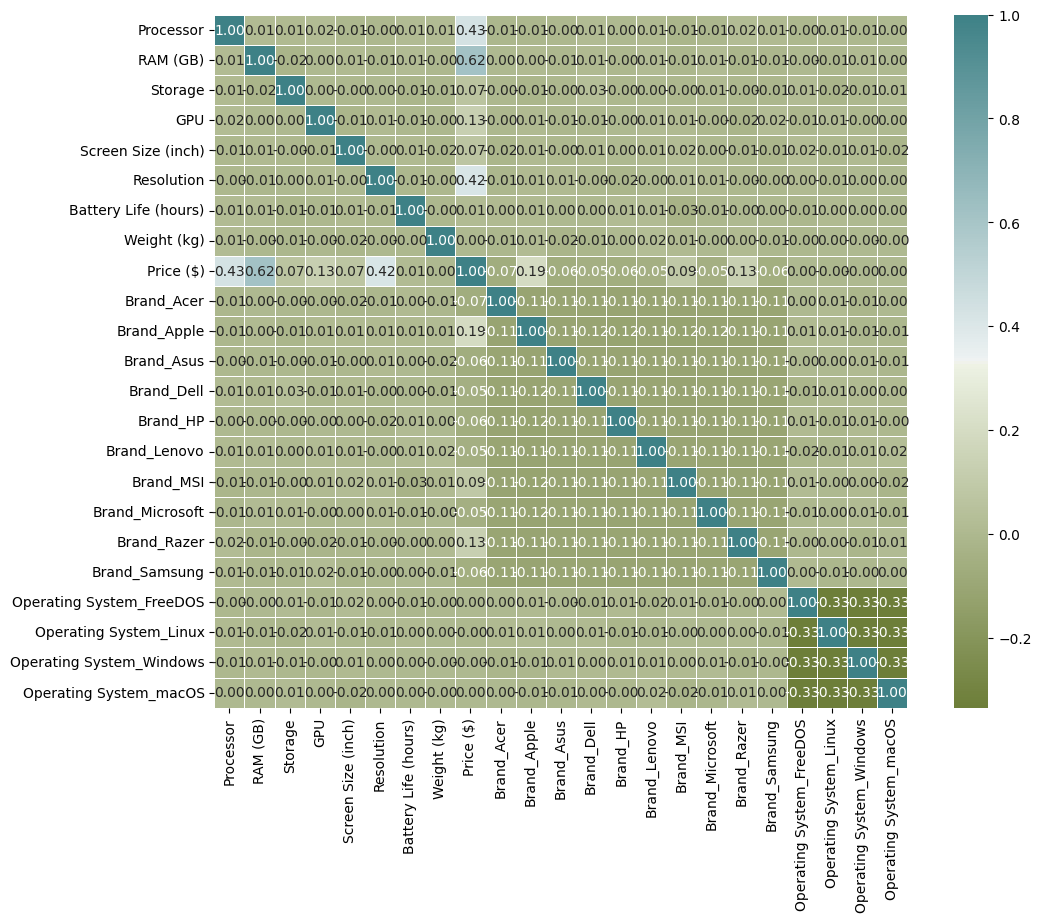

In [ ]:
import seaborn as sns
import numpy as np
from matplotlib import pylab as plt

plt.figure(figsize=(12,9))

corr = encoded_data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

Видно, что бренд мало влияет, а ОС вообще не влияет, удаляем

In [46]:
columns_to_drop = encoded_data.filter(like='Brand_').columns
encoded_data = encoded_data.drop(columns=columns_to_drop)
columns_to_drop = encoded_data.filter(like='Operating System_').columns
encoded_data = encoded_data.drop(columns=columns_to_drop)

In [47]:
encoded_data.head()

,Processor,RAM (GB),Storage,GPU,Screen Size (inch),Resolution,Battery Life (hours),Weight (kg),Price ($)
0,1,64,3,2,17.3,3,8.9,1.42,3997.07
1,3,4,4,7,14.0,1,9.4,2.57,1355.78
2,2,32,5,5,13.3,4,8.5,1.74,2673.07
3,2,4,2,7,13.3,1,10.5,3.10,751.17
4,1,4,2,4,16.0,4,5.7,3.38,2059.83


<Axes: >

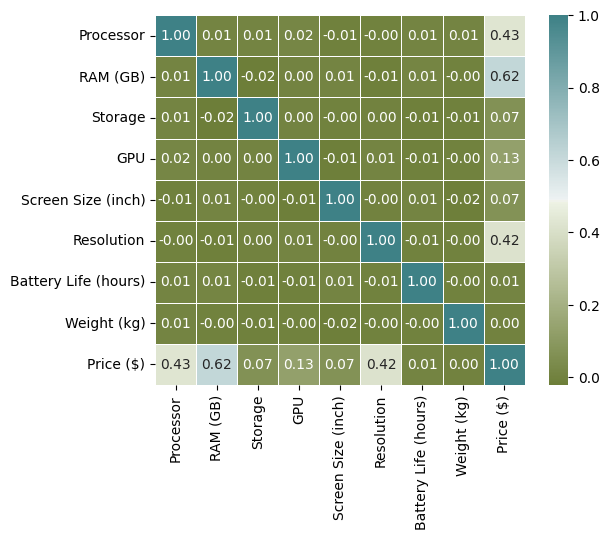

In [60]:
corr = encoded_data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

Начинаем обучать линейную регрессию

In [ ]:
from sklearn.model_selection import train_test_split

X = encoded_data.drop('Price ($)', axis=1)
y = encoded_data['Price ($)']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [ ]:
mean_squared_error(pred_test, ytest) ** 0.5

657.4416514157432

In [ ]:
mean_squared_error(pred_train, ytrain) ** 0.5

641.6939395264312

"Training error is slightly lower than test error", следовательно, модель обучена хорошо.
Попробуем нормализовать ОЗУ, так как разница между 4 и 64 довольно большая.

In [77]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cpu_normalized = encoded_data.copy()
cpu_normalized['RAM (GB)'] = scaler.fit_transform(encoded_data[['RAM (GB)']])

In [82]:
X = cpu_normalized.drop('Price ($)', axis=1)
y = cpu_normalized['Price ($)']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [86]:
mean_squared_error(pred_test, ytest) ** 0.5

657.441651415743

In [85]:
mean_squared_error(pred_train, ytrain) ** 0.5

641.6939395264311

Разницы нет. Попробуем использовать OneHotEncoding на ЦП, ГП, разрешении и памяти.

In [ ]:
encoded_data = data.drop("Brand", axis=1)
encoded_data = encoded_data.drop("Operating System", axis=1)

encoded_data = pd.get_dummies(encoded_data, columns=['GPU', "Processor", "Resolution", "Storage"])
encoded_data.head()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),GPU_AMD Radeon RX 6600,GPU_AMD Radeon RX 6800,GPU_Integrated,GPU_Nvidia GTX 1650,GPU_Nvidia RTX 2060,...,Processor_Intel i9,Resolution_1366x768,Resolution_1920x1080,Resolution_2560x1440,Resolution_3840x2160,Storage_1TB HDD,Storage_1TB SSD,Storage_256GB SSD,Storage_2TB SSD,Storage_512GB SSD
0,64,17.3,8.9,1.42,3997.07,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
1,4,14.0,9.4,2.57,1355.78,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
2,32,13.3,8.5,1.74,2673.07,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
3,4,13.3,10.5,3.10,751.17,False,False,False,False,False,...,False,True,False,False,False,False,False,True,False,False
4,4,16.0,5.7,3.38,2059.83,True,False,False,False,False,...,False,False,False,False,True,False,False,True,False,False


In [95]:
X = encoded_data.drop('Price ($)', axis=1)
y = encoded_data['Price ($)']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [96]:
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [97]:
mean_squared_error(pred_test, ytest) ** 0.5

591.9766135604352

In [98]:
mean_squared_error(pred_train, ytrain) ** 0.5

580.9422862270889

In [ ]:
encoded_data["Price ($)"].describe()

count    11768.000000
mean      2183.571608
std       1316.886132
min        279.570000
25%       1272.045000
50%       1840.865000
75%       2698.370000
max      10807.880000
Name: Price ($), dtype: float64

MSE стала меньше, при этом train MSE все еще меньше test MSE, что хорошо. Ошибка в 600 долларов при диапазоне 279.57-10807.88 не самый хороший показатель, но и не плохой. Попробуем теперь просто все захотэнкодинг

In [ ]:
encoded_data = pd.get_dummies(data, columns=['GPU', "Processor", "Resolution", "Storage", "Brand", "Operating System"])

In [ ]:
X = encoded_data.drop('Price ($)', axis=1)
y = encoded_data['Price ($)']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [102]:
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [103]:
mean_squared_error(pred_test, ytest) ** 0.5

462.16300615130245

In [104]:
mean_squared_error(pred_train, ytrain) ** 0.5

449.2297728910168

Стало намного лучше. Все-таки, не стоило удалять признаки. Да, они мало влияют, но с ними точность увеличивается, а обучение не становится намного дольше (в нашем случае). Попробуем все-таки удалить ОС, она не влияет на цену.

In [111]:
encoded_data = data.drop("Operating System", axis=1)
encoded_data = pd.get_dummies(encoded_data, columns=['GPU', "Processor", "Resolution", "Storage", "Brand"], drop_first=True)

In [112]:
X = encoded_data.drop('Price ($)', axis=1)
y = encoded_data['Price ($)']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [113]:
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [114]:
mean_squared_error(pred_test, ytest) ** 0.5

462.0677238084973

In [115]:
mean_squared_error(pred_train, ytrain) ** 0.5

449.2410333709491

Все такой же результат. В итоге, пока что наша точная модель это то, где мы удалили информацию об ОС и захотэнкодили все остальное. Давайте теперь попробуем вернуться к энкодингу, который apply.(map), и возвести ЦП, разрешение и ОЗУ в квадрат, так как у них довольно большая корреляция с ценой.

In [143]:
encoded_data = data.drop("Operating System", axis=1)
encoded_data = pd.get_dummies(encoded_data, columns=["Brand"], drop_first=True)

In [144]:
encoded_data['Storage'] = encoded_data['Storage'].apply(map_storage)
encoded_data['Processor'] = encoded_data['Processor'].apply(map_cpu)
encoded_data['GPU'] = encoded_data['GPU'].apply(map_gpu)
encoded_data['Resolution'] = encoded_data['Resolution'].apply(map_resolution)

<Axes: >

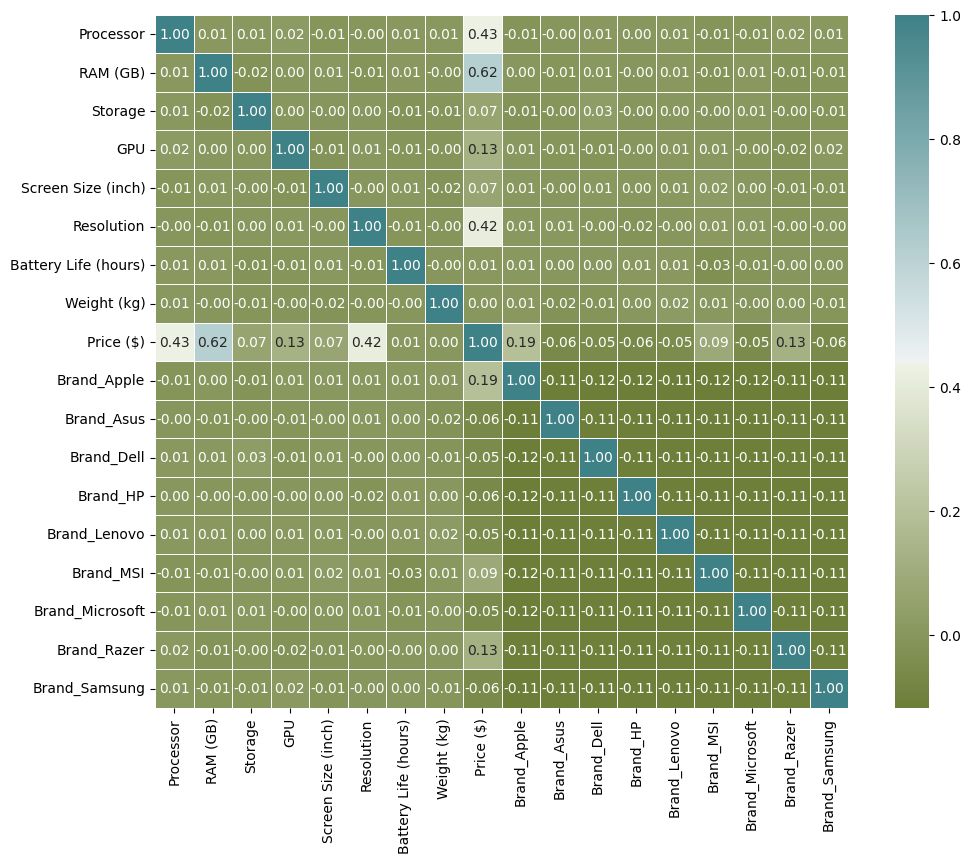

In [145]:
plt.figure(figsize=(12,9))

corr = encoded_data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

<Axes: xlabel='RAM (GB)', ylabel='Price ($)'>

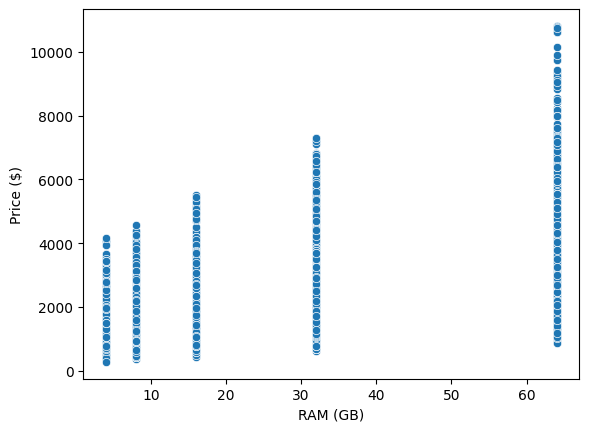

In [ ]:
sns.scatterplot(x='RAM (GB)', y='Price ($)', data=encoded_data)

<Axes: xlabel='Processor', ylabel='Price ($)'>

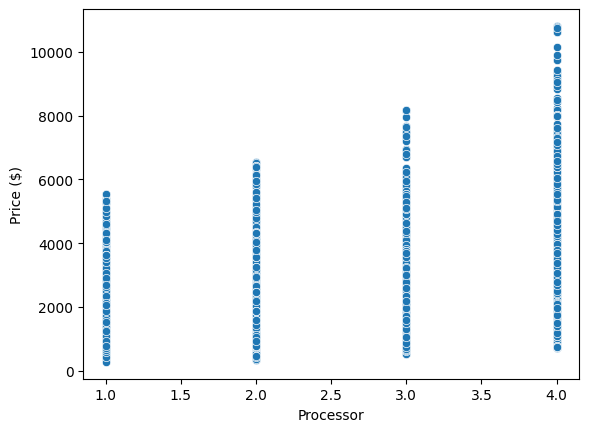

In [149]:
sns.scatterplot(x='Processor', y='Price ($)', data=encoded_data)

<Axes: xlabel='Resolution', ylabel='Price ($)'>

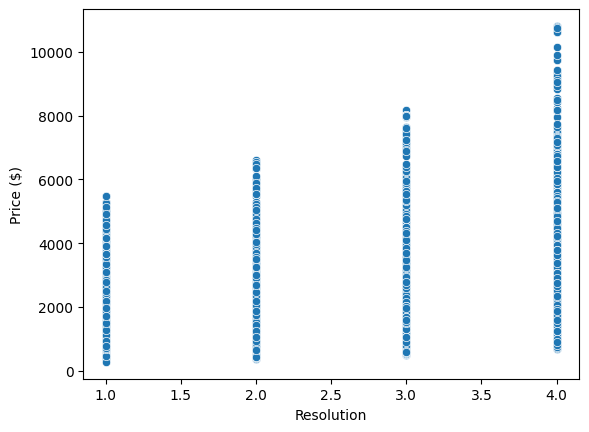

In [150]:
sns.scatterplot(x='Resolution', y='Price ($)', data=encoded_data)

Видимо, тут не надо возводить в квадрат. Но проверим на всякий

In [151]:
encoded_data['RAM (GB)'] = encoded_data['RAM (GB)'] ** 2
encoded_data['Processor'] = encoded_data['Processor'] ** 2
encoded_data['Resolution'] = encoded_data['Resolution'] ** 2

<Axes: >

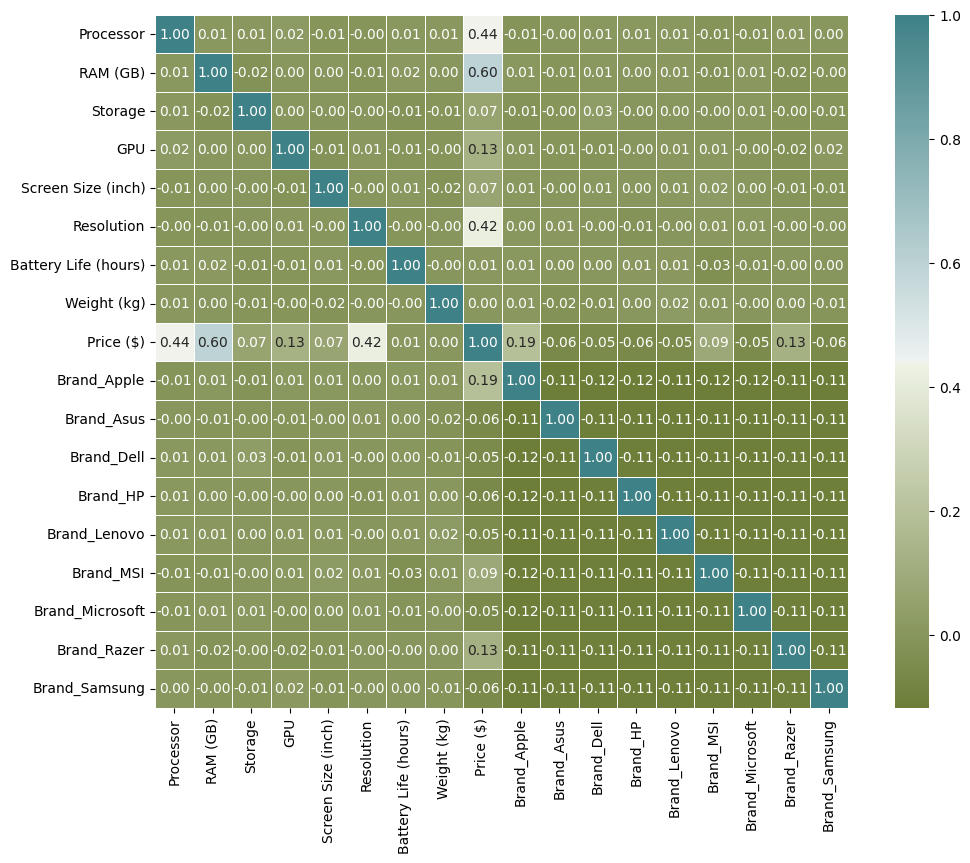

In [152]:
plt.figure(figsize=(12,9))

corr = encoded_data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

In [153]:
X = encoded_data.drop('Price ($)', axis=1)
y = encoded_data['Price ($)']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [154]:
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [165]:
mean_squared_error(pred_test, ytest) ** 0.5

549.6067806737871

In [156]:
mean_squared_error(pred_train, ytrain) ** 0.5

536.7566710306418

Ошибка возросла. Давайте попробуем добавить параметры, например, ГП\*Разрешение, ЦП\*ОЗУ, ГП*ОЗУ, Размер экрана * Разрешение, Размер экрана * вес, Время жизни батареи * ЦП, Время жизни батареи * ГП.

In [ ]:
encoded_data = data.drop("Operating System", axis=1)
encoded_data = pd.get_dummies(encoded_data, columns=["Brand"], drop_first=True)

In [158]:
encoded_data['Storage'] = encoded_data['Storage'].apply(map_storage)
encoded_data['Processor'] = encoded_data['Processor'].apply(map_cpu)
encoded_data['GPU'] = encoded_data['GPU'].apply(map_gpu)
encoded_data['Resolution'] = encoded_data['Resolution'].apply(map_resolution)

In [159]:
encoded_data["GPU * Res"] = encoded_data["GPU"] * encoded_data["Resolution"]
encoded_data["GPU * RAM"] = encoded_data["GPU"] * encoded_data["RAM (GB)"]
encoded_data["CPU * RAM"] = encoded_data["Processor"] * encoded_data["RAM (GB)"]
encoded_data["Size * Res"] = encoded_data["Screen Size (inch)"] * encoded_data["Resolution"]
encoded_data["Size * Weight"] = encoded_data["Screen Size (inch)"] * encoded_data["Weight (kg)"]
encoded_data["Battery life * CPU"] = encoded_data["Battery Life (hours)"] * encoded_data["Processor"]
encoded_data["Battery life * GPU"] = encoded_data["Battery Life (hours)"] * encoded_data["GPU"]

<Axes: >

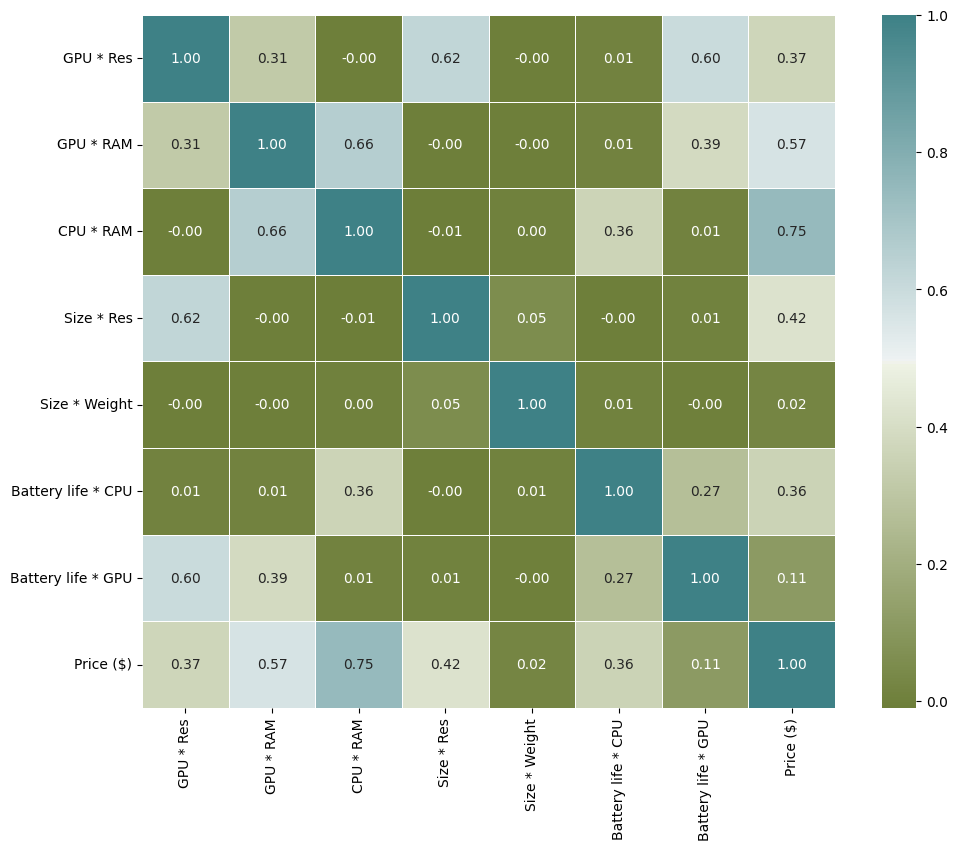

In [163]:
plt.figure(figsize=(12,9))

corr = encoded_data[['GPU * Res', 'GPU * RAM', 'CPU * RAM', 'Size * Res', 'Size * Weight', 'Battery life * CPU', 'Battery life * GPU', 'Price ($)']].corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

Убираем вес на размер

In [164]:
encoded_data = encoded_data.drop("Size * Weight", axis=1)

In [166]:
X = encoded_data.drop('Price ($)', axis=1)
y = encoded_data['Price ($)']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [167]:
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [168]:
mean_squared_error(pred_test, ytest) ** 0.5

498.7086357773002

In [169]:
mean_squared_error(pred_train, ytrain) ** 0.5

475.3767356767009

Отлично, мы добавили некоторые признаки и модель стала лучше, но все еще самая лучшая модель получается, если мы просто все заэнкодим. Тогда давайте попробуем хотэнкодинг + скомбинируем признаки. Это добавит очень много признаков, но мы посмотрим, удачно ли это будет или нет.

In [262]:
encoded_data = data.drop("Operating System", axis=1)
encoded_data = pd.get_dummies(encoded_data, columns=['GPU', "Processor", "Resolution", "Storage", "Brand"])

In [263]:
encoded_data.head()

,RAM (GB),Screen Size (inch),Battery Life (hours),Weight (kg),Price ($),GPU_AMD Radeon RX 6600,GPU_AMD Radeon RX 6800,GPU_Integrated,GPU_Nvidia GTX 1650,GPU_Nvidia RTX 2060,...,Brand_Acer,Brand_Apple,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo,Brand_MSI,Brand_Microsoft,Brand_Razer,Brand_Samsung
0,64,17.3,8.9,1.42,3997.07,False,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1,4,14.0,9.4,2.57,1355.78,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,32,13.3,8.5,1.74,2673.07,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,4,13.3,10.5,3.10,751.17,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,4,16.0,5.7,3.38,2059.83,True,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [264]:
encoded_data.columns

Index(['RAM (GB)', 'Screen Size (inch)', 'Battery Life (hours)', 'Weight (kg)',
       'Price ($)', 'GPU_AMD Radeon RX 6600', 'GPU_AMD Radeon RX 6800',
       'GPU_Integrated', 'GPU_Nvidia GTX 1650', 'GPU_Nvidia RTX 2060',
       'GPU_Nvidia RTX 3060', 'GPU_Nvidia RTX 3080', 'Processor_AMD Ryzen 3',
       'Processor_AMD Ryzen 5', 'Processor_AMD Ryzen 7',
       'Processor_AMD Ryzen 9', 'Processor_Intel i3', 'Processor_Intel i5',
       'Processor_Intel i7', 'Processor_Intel i9', 'Resolution_1366x768',
       'Resolution_1920x1080', 'Resolution_2560x1440', 'Resolution_3840x2160',
       'Storage_1TB HDD', 'Storage_1TB SSD', 'Storage_256GB SSD',
       'Storage_2TB SSD', 'Storage_512GB SSD', 'Brand_Acer', 'Brand_Apple',
       'Brand_Asus', 'Brand_Dell', 'Brand_HP', 'Brand_Lenovo', 'Brand_MSI',
       'Brand_Microsoft', 'Brand_Razer', 'Brand_Samsung'],
      dtype='object')

In [265]:
processor_columns = [col for col in encoded_data.columns if col.startswith("Processor_")]
for col in processor_columns:
    encoded_data[f"{col}_RAM"] = encoded_data[col] * encoded_data["RAM (GB)"]
for col in processor_columns:
    encoded_data[f"{col}_Battery"] = encoded_data[col] * encoded_data["Battery Life (hours)"]

res_columns = [col for col in encoded_data.columns if col.startswith("Resolution_")]
for col in res_columns:
    encoded_data[f"{col}_Size"] = encoded_data[col] * encoded_data["Screen Size (inch)"]

gpu_columns = [col for col in encoded_data.columns if col.startswith("GPU_")]
for col in gpu_columns:
    encoded_data[f"{col}_RAM"] = encoded_data[col] * encoded_data["RAM (GB)"]
for col in gpu_columns:
    for col2 in res_columns:
        encoded_data[f"{col}_Res"] = encoded_data[col] * encoded_data[col2]
for col in gpu_columns:
    encoded_data[f"{col}_Battery"] = encoded_data[col] * encoded_data["Battery Life (hours)"]


In [266]:
X = encoded_data.drop('Price ($)', axis=1)
y = encoded_data['Price ($)']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [267]:
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [268]:
mean_squared_error(pred_test, ytest) ** 0.5

394.21714256657134

In [269]:
mean_squared_error(pred_train, ytrain) ** 0.5

375.17434938853194

Замечательно, ошибка стала меньше! Но количество параметров пугает...

In [270]:
len(encoded_data.columns)

80

А если запустить код комбинирования столбцов еще раз, то результаты станут лучше (так как код начнет комбинировать уже скомбинированные параметры). Но если запустить код в третий раз, то результат станет хуже, а в 4 еще хуже.

In [271]:
processor_columns = [col for col in encoded_data.columns if col.startswith("Processor_")]
for col in processor_columns:
    encoded_data[f"{col}_RAM"] = encoded_data[col] * encoded_data["RAM (GB)"]
for col in processor_columns:
    encoded_data[f"{col}_Battery"] = encoded_data[col] * encoded_data["Battery Life (hours)"]

res_columns = [col for col in encoded_data.columns if col.startswith("Resolution_")]
for col in res_columns:
    encoded_data[f"{col}_Size"] = encoded_data[col] * encoded_data["Screen Size (inch)"]

gpu_columns = [col for col in encoded_data.columns if col.startswith("GPU_")]
for col in gpu_columns:
    encoded_data[f"{col}_RAM"] = encoded_data[col] * encoded_data["RAM (GB)"]
for col in gpu_columns:
    for col2 in res_columns:
        encoded_data[f"{col}_Res"] = encoded_data[col] * encoded_data[col2]
for col in gpu_columns:
    encoded_data[f"{col}_Battery"] = encoded_data[col] * encoded_data["Battery Life (hours)"]


/var/folders/7n/m8971tbx7f52pkv3btb54wrm0000gn/T/ipykernel_96183/84664929.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_data[f"{col}_RAM"] = encoded_data[col] * encoded_data["RAM (GB)"]
/var/folders/7n/m8971tbx7f52pkv3btb54wrm0000gn/T/ipykernel_96183/84664929.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_data[f"{col}_RAM"] = encoded_data[col] * encoded_data["RAM (GB)"]
/var/folders/7n/m8971tbx7f52pkv3btb54wrm0000gn/T/ipykernel_96183/84664929.py:13: PerformanceWarning: DataFrame is highly fragmented.

In [272]:
X = encoded_data.drop('Price ($)', axis=1)
y = encoded_data['Price ($)']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [273]:
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [274]:
mean_squared_error(pred_test, ytest) ** 0.5

340.927742495085

In [275]:
mean_squared_error(pred_train, ytrain) ** 0.5

321.08261471835664

In [276]:
processor_columns = [col for col in encoded_data.columns if col.startswith("Processor_")]
for col in processor_columns:
    encoded_data[f"{col}_RAM"] = encoded_data[col] * encoded_data["RAM (GB)"]
for col in processor_columns:
    encoded_data[f"{col}_Battery"] = encoded_data[col] * encoded_data["Battery Life (hours)"]

res_columns = [col for col in encoded_data.columns if col.startswith("Resolution_")]
for col in res_columns:
    encoded_data[f"{col}_Size"] = encoded_data[col] * encoded_data["Screen Size (inch)"]

gpu_columns = [col for col in encoded_data.columns if col.startswith("GPU_")]
for col in gpu_columns:
    encoded_data[f"{col}_RAM"] = encoded_data[col] * encoded_data["RAM (GB)"]
for col in gpu_columns:
    for col2 in res_columns:
        encoded_data[f"{col}_Res"] = encoded_data[col] * encoded_data[col2]
for col in gpu_columns:
    encoded_data[f"{col}_Battery"] = encoded_data[col] * encoded_data["Battery Life (hours)"]


/var/folders/7n/m8971tbx7f52pkv3btb54wrm0000gn/T/ipykernel_96183/84664929.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_data[f"{col}_RAM"] = encoded_data[col] * encoded_data["RAM (GB)"]
/var/folders/7n/m8971tbx7f52pkv3btb54wrm0000gn/T/ipykernel_96183/84664929.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  encoded_data[f"{col}_RAM"] = encoded_data[col] * encoded_data["RAM (GB)"]
/var/folders/7n/m8971tbx7f52pkv3btb54wrm0000gn/T/ipykernel_96183/84664929.py:3: PerformanceWarning: DataFrame is highly fragmented.  T

In [277]:
X = encoded_data.drop('Price ($)', axis=1)
y = encoded_data['Price ($)']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=42)

In [278]:
model.fit(Xtrain, ytrain)
pred_train = model.predict(Xtrain)
pred_test = model.predict(Xtest)

In [279]:
mean_squared_error(pred_test, ytest) ** 0.5

341.2594322072613

In [280]:
mean_squared_error(pred_train, ytrain) ** 0.5

316.1478700233983

В общем, 340 и 321 — довольно неплохой результат